In [39]:
import pandas as pd
%matplotlib inline

In [40]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv", usecols=["Area_Code", "Remain", "Leave"] )

In [41]:
df.columns
df.head(2)

,Area_Code,Remain,Leave
0,E06000031,34176,53216
1,E06000032,36708,47773


In [42]:
census_data = {
     "age" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks102ew.xls",
     "education" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks501ew.xls",
     "economic" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks601ew.xls",
}

In [43]:
edu = pd.read_excel(io=census_data["education"], sheetname="KS501EW_Numbers", header=10, parse_cols=("A,K"), skiprows=[11,12,13])
edu.dropna(how='all', inplace=True)
edu.rename(index=str, inplace=True, columns={"Area code": "are", "Highest level of qualification: Level 4 qualifications and above": "highedu"})
edu.head(5)

,are,highedu
1,K04000001,12383477.0
3,E92000001,11769361.0
5,E12000001,473382.0
7,E06000047,91249.0
8,E06000005,20244.0


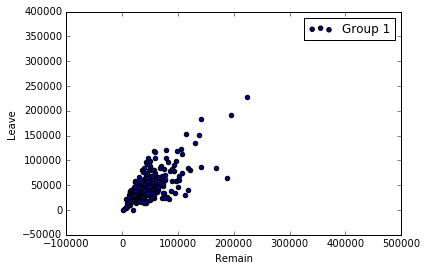

In [44]:
ax = df.plot.scatter(x='Remain', y='Leave', color='DarkBlue', label='Group 1');
# this fails with a keyError (while key is there!)
# note ax=ax should combine the plots
# edu.plot.scatter(x='area', y='highedu', color='DarkGreen', label='Group 2', ax=ax);

In [45]:
dfr["Perc_leave"] = dfr["Leave"] / (dfr["Remain"] + dfr["Leave"]) * 100
dfr["Perc_remain"] = dfr["Remain"] / (dfr["Remain"] + dfr["Leave"]) * 100

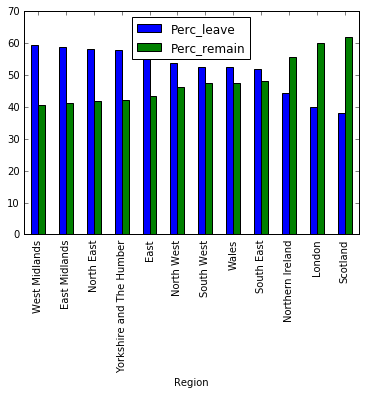

In [46]:
voteplot = dfr[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False).plot(kind="bar")

In [48]:
inc_data = "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/regional-trends/region-and-country-profiles/region-and-country-profiles---key-statistics-and-profiles--october-2013/regional-profiles---key-statistics--october-2013.xls"

In [49]:
inc = pd.read_excel(io=inc_data, sheetname="5", header=2, parse_cols=("C,H"), skiprows=[3,4,5,6,7,8,9,10])
inc.dropna(how='all', inplace=True)
inc.rename(index=str, inplace=True, columns={"Region": "region", "Gross disposable\nhousehold income4\nper head, \n20112 \n(£) ": "income"})
inc

,region,income
0,North East,13560.0
1,North West,14476.0
2,Yorkshire and The Humber,13819.0
3,East Midlands,14561.0
4,West Midlands,14362.0
5,East,16608.0
6,London,20509.0
7,South East,18087.0
8,South West,16014.0


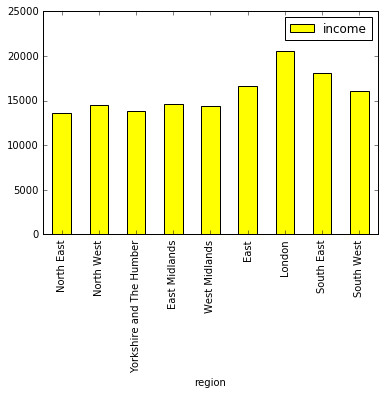

In [50]:
incplot = inc.plot(kind="bar", x="region", color='Yellow', label='Income')

In [51]:
# try combine the two
# returns only: <matplotlib.axes._subplots.AxesSubplot at 0x117e09dd8> , no graph
inc.plot(kind="bar", x="region", color='Yellow', label='Income', ax=voteplot)